In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv('Salary Data.csv') 
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
df = df.dropna()

In [7]:
df["Gender"] = df["Gender"].replace({"Male":1,"Female":0})
df["Education Level"] = df["Education Level"].replace({"Bachelor's":1,"Master's":2,"PhD":3})
le = LabelEncoder()
df["Job Title-id"] = le.fit_transform(df["Job Title"])

C:\Users\wwwwe\AppData\Local\Temp\ipykernel_12940\601625275.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male":1,"Female":0})
C:\Users\wwwwe\AppData\Local\Temp\ipykernel_12940\601625275.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Education Level"] = df["Education Level"].replace({"Bachelor's":1,"Master's":2,"PhD":3})


In [8]:
x = np.array(df[['Age', 'Salary','Years of Experience','Gender','Education Level',"Job Title-id"]])
y = np.array(df['Salary'])
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

In [10]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [11]:
accuracy_score(pipe.predict(X_test), y_test)

0.2872340425531915

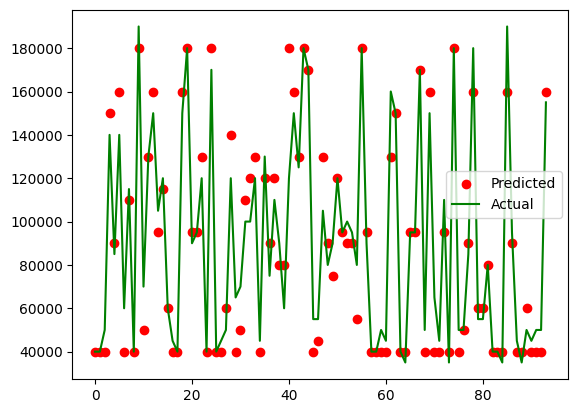

In [13]:
y_pred = pipe.predict(X_test) 

plt.scatter(range(len(y_pred)), y_pred, label='Predicted', c='red')
plt.plot(range(len(y_test)), y_test, label='Actual', c='green')
plt.legend()
plt.show()